In [395]:
import numpy as np
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
# 폰트 설정
mpl.rc('font', family='Malgun Gothic')
# 유니코드에서  음수 부호설정
mpl.rc('axes', unicode_minus=False)

In [396]:
font1 = {'family': 'Malgun Gothic', 'size': 18, 
         'color':  'Green'}
font2 = {'family': 'Malgun Gothic', 'size': 18, 'weight': 'bold',
         'color':  'darkred'}
font3 = {'family': 'Malgun Gothic', 'size': 12, 'weight': 'light',
         'color':  'blue'}

1. Matplotlib을 이용하여 월별 카페의 개수를 나타내는 간단한 막대 그래프(Bar Graph)를 그리는 프로그램을 작성. 단 막대 그래프 x축 간격은 3달<br>
(cafe_2year.csv 파일)

In [397]:
cafe = pd.read_csv('cafe_2year.csv')
cafe.head(10)

,기준월,카페수
0,201710,79296
1,201711,80738
2,201712,76923
3,201801,77942
4,201802,84967
5,201803,80719
6,201804,80719
7,201805,87156
8,201806,81248
9,201807,82191


In [398]:
cafe.기준월 = cafe.기준월.astype(str)

In [399]:
type(cafe.기준월[0])

str

In [400]:
cafe.기준월[0][-2:]

'10'

In [401]:
cafe['월'] = cafe.apply(lambda r: int(r.기준월[-2:]), axis = 1)

In [402]:
newcafe = cafe[cafe['월'] % 3 == 1]
newcafe

,기준월,카페수,월
0,201710,79296,10
3,201801,77942,1
6,201804,80719,4
9,201807,82191,7
12,201810,89050,10
15,201901,96352,1
18,201904,97421,4
21,201907,98311,7


In [403]:
x = newcafe.기준월
y = newcafe.카페수

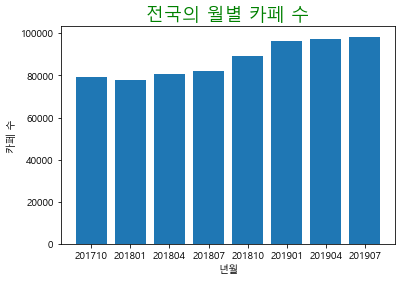

In [404]:
plt.title('전국의 월별 카페 수', fontdict=font1)
plt.xlabel('년월')
plt.ylabel('카페 수')
plt.bar(x,y,tick_label=label)
plt.show()

2. 서울과 6개의 광역시(부산, 대구, 인천, 대전, 광주, 울산)에 대해 지역, 일반의, 인턴, 레지던트, 전문의 의사 수를 출력하는 프로그램을 작성하시오.

In [405]:
doctor19 = pd.read_csv('doctor_2019.csv')
doctor19.head(10)

,지역,병원명,일반의 수,인턴 수,레지던트 수,전문의 수
0,인천,가톨릭대학교인천성모병원,1,22,68,201
1,서울,강북삼성병원,6,28,137,204
2,서울,건국대학교병원,1,37,164,225
3,대구,경북대학교병원,5,77,209,225
4,경남,경상대학교병원,1,35,114,182
5,서울,경희대학교병원,3,94,153,223
6,대구,계명대학교동산병원,3,44,145,238
7,서울,고려대학교의과대학부속구로병원,1,32,178,292
8,경기,고려대학교의과대학부속안산병원,4,31,94,218
9,부산,고신대학교복음병원,2,24,96,194


In [406]:
newdoc19 = doctor19.groupby('지역').sum()
newdoc19.rename(columns= {
    newdoc19.columns[0] : '일반의',
    newdoc19.columns[1] : '인턴',
    newdoc19.columns[2] : '레지던트',
    newdoc19.columns[3] : '전문의'
}, inplace = True )

doctor2 = newdoc19.sort_values(by='일반의', ascending=False)[:6]
doctor2

,일반의,인턴,레지던트,전문의
지역,,,,
서울,162,1196,4757,9375
경기,130,458,1836,5471
부산,58,197,785,2211
인천,47,138,444,1518
경남,38,103,315,1473
경북,37,3,45,929


3. 위 결과를 doctor2.csv로 저장

In [407]:
doctor2.to_csv('doctor2.csv', sep=',', encoding='UTF-8')

4. doctor2.csv를 읽어들여 서울과 6개 광역시의 종합 병원 전문의 의사 수를 scatter plot으로 그림

In [408]:
doc2 = pd.read_csv('doctor2.csv')
x = doc2['지역']
y = doc2['전문의']

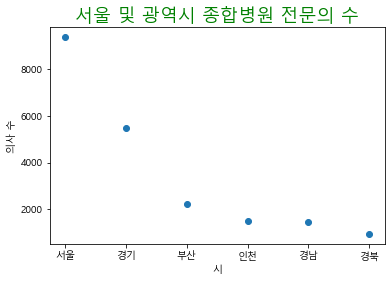

In [409]:
plt.title('서울 및 광역시 종합병원 전문의 수',fontdict=font1)
plt.xlabel('시')
plt.ylabel('의사 수')
plt.scatter(x,y)
plt.show()

5. doctor2.csv를 읽어 서울과 6개 광역시의 종합병원의 일반의, 인턴, 레지던트, 전문의 수를 선 그래프로 나타내시오

In [410]:
doc3 = pd.read_csv('doctor2.csv')
doc3

,지역,일반의,인턴,레지던트,전문의
0,서울,162,1196,4757,9375
1,경기,130,458,1836,5471
2,부산,58,197,785,2211
3,인천,47,138,444,1518
4,경남,38,103,315,1473
5,경북,37,3,45,929


In [411]:
doc3.columns

Index(['지역', '일반의', '인턴', '레지던트', '전문의'], dtype='object')

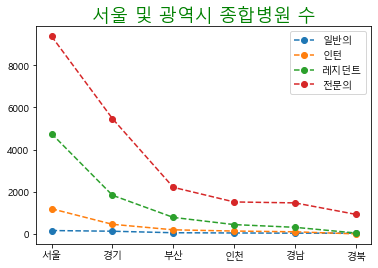

In [412]:
for column in doc3.columns:
    if column == '지역':
        continue

    plt.plot(doc3['지역'],doc3[column],'o--', label=column)

plt.title('서울 및 광역시 종합병원 수', fontdict=font1)
plt.legend()
plt.show()

6. doctor2.csv 파일에서 서울 종합병원 의사 수 분포를 의사 유형별로 나타내는 파이 그래프

In [413]:
doc4 = pd.read_csv('doctor2.csv')
doc4.set_index('지역',inplace=True)


In [414]:
district = doc4.columns
district

Index(['일반의', '인턴', '레지던트', '전문의'], dtype='object')

In [415]:
seoul = doc4.T.서울
seoul

일반의      162
인턴      1196
레지던트    4757
전문의     9375
Name: 서울, dtype: int64

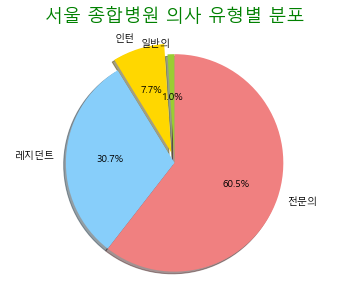

In [416]:
plt.figure(figsize=(6,5))
plt.axis('equal')
explode = (0, 0.1, 0, 0)
colors = ['yellowgreen', 'gold', 'lightskyblue', 'lightcoral']

plt.pie(seoul, labels=district, explode=explode, shadow=True, autopct='%1.1f%%', colors=colors, startangle=90)

plt.title('서울 종합병원 의사 유형별 분포', fontdict=font1)
plt.show()